Project Name: Salary Predictions of Data Professions
Welcome to the Machine Learning Internship, focused on predicting the salaries of data professionals. In
this project, you will dive into the world of regression tasks and gain hands-on experience in data
analysis, feature engineering, and machine learning model development. The goal is to predict the
salaries of data professionals based on a rich dataset.
Problem Statement:
Salaries in the field of data professions vary widely based on factors such as experience, job role, and
performance. Accurately predicting salaries for data professionals is essential for both job seekers and
employers.
Your Mission:
Your mission in this internship is to build a predictive model for salaries of data professionals. You will
follow these key steps:
1. Exploratory Data Analysis (EDA): Dive into the dataset, conduct comprehensive EDA, and unveil
valuable insights about data professionals' salaries. EDA will involve data visualization, summary
statistics, and identifying patterns in the data.
2. Feature Engineering: Create new features or transform existing ones that can provide additional
insights or improve model performance. Feature engineering might involve deriving features related to
experience, job role, and performance.
3. Data Preprocessing: Prepare the data for model training. This includes handling missing values,
encoding categorical variables, and scaling or normalizing features as needed.
4. Machine Learning Model Development: Train various machine learning regression models to predict
salaries. Experiment with different algorithms such as linear regression, decision trees, random forests,
and gradient boosting to find the best-performing model.
5. Model Evaluation: Assess the performance of your models using appropriate evaluation metrics like

Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-
squared (R2) score. Identify the model that provides the most accurate salary predictions.

6. ML Pipelines and Model Deployment: Create ML Pipelines to streamline the end-to-end machine
learning process, from data preprocessing to model training. Additionally, deploy a model that can
generate predictions for unseen data. Consider using frameworks like Flask or FastAPI for deployment.
7. Recommendations: Based on your findings and insights from the model, provide actionable
recommendations. These recommendations can be related to factors influencing salaries and potential
strategies for improving earnings in data professions.

1 Exploratory Data Analysis (EDA)

Load the dataset:

Import necessary libraries (Pandas, NumPy, Matplotlib, Seaborn).
Load the dataset into a Pandas DataFrame.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset - Project 1 (1).csv')

In [95]:
print(df.info())
print("\nDataset shape:", df.shape)
print("\nColumn names:", list(df.columns))
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB
None

Dataset shape: (2639, 13)

Column names: ['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION', 'AGE

Data overview:

Check the first few rows of the dataset using df.head().
Get a summary of the dataset

In [66]:
print(df.head())
print(df.info())
print(df.describe())

  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns)

Data visualization:

Plot histograms for numerical features like AGE, SALARY, PAST EXP.
Use bar plots or pie charts to visualize categorical features like SEX, DESIGNATION, UNIT

1. Histogram of SALARY
To visualize the distribution of salaries


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


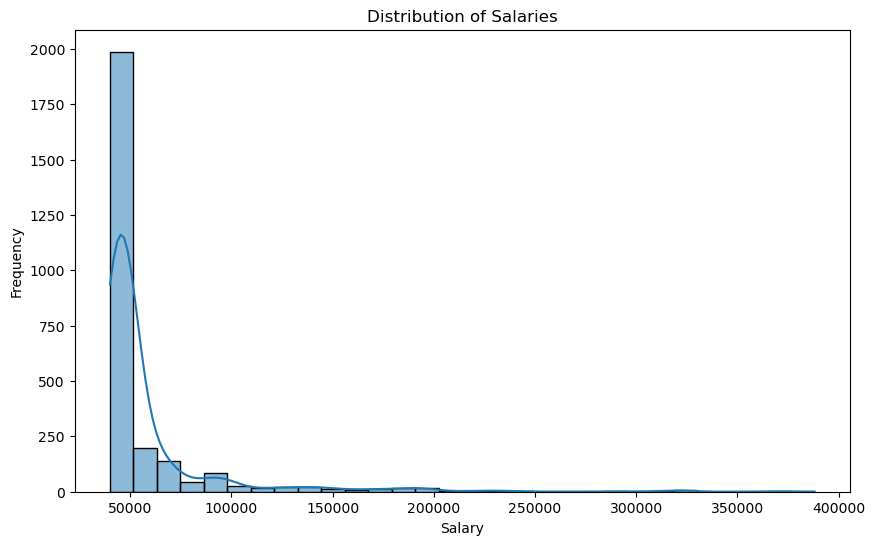

In [67]:
# Histogram of SALARY
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], kde=True, bins=30)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Based on the histogram, we can observe that:

Most salaries are concentrated around the lower range:

A significant number of data professionals have salaries clustered around the lower end (approximately $50,000).
Skewed Distribution:

The distribution is right-skewed, indicating that while most salaries are lower, there are a few data professionals with significantly higher salaries, up to $400,000.

Bar chart of average salary by DESIGNATION

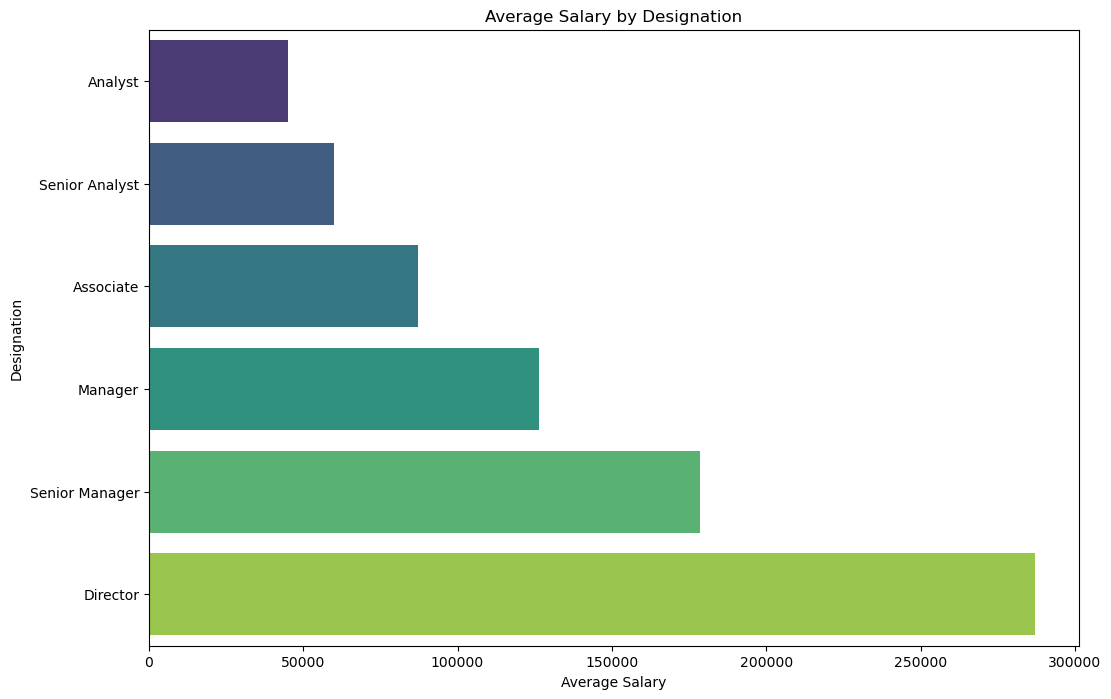

In [68]:
# Bar chart of average salary by DESIGNATION
plt.figure(figsize=(12, 8))
average_salary_by_designation = df.groupby('DESIGNATION')['SALARY'].mean().sort_values()
sns.barplot(x=average_salary_by_designation.values, y=average_salary_by_designation.index, palette='viridis')
plt.title('Average Salary by Designation')
plt.xlabel('Average Salary')
plt.ylabel('Designation')
plt.show()

From the bar chart of average salary by designation, we can observe the following trends:

Hierarchy of Salaries by Designation:

Analyst: The average salary for analysts is the lowest among the listed designations.
Senior Analyst: Senior analysts earn more than analysts but less than associates.
Associate: Associates have a higher average salary compared to analysts and senior analysts.
Manager: Managers earn more than associates, indicating a step up in the salary hierarchy.
Senior Manager: Senior managers earn significantly more than managers.
Director: Directors have the highest average salary, showing a substantial increase compared to other roles.
Salary Progression:

There is a clear progression in salaries as one moves up the hierarchy from analyst to director. This indicates that higher positions within the organization come with higher compensation.
Significant Jumps:

The jump in average salary is particularly notable from Senior Manager to Director, highlighting a significant increase in compensation at the executive level.

 Scatter Plot of SALARY vs AGE or PAST EXP

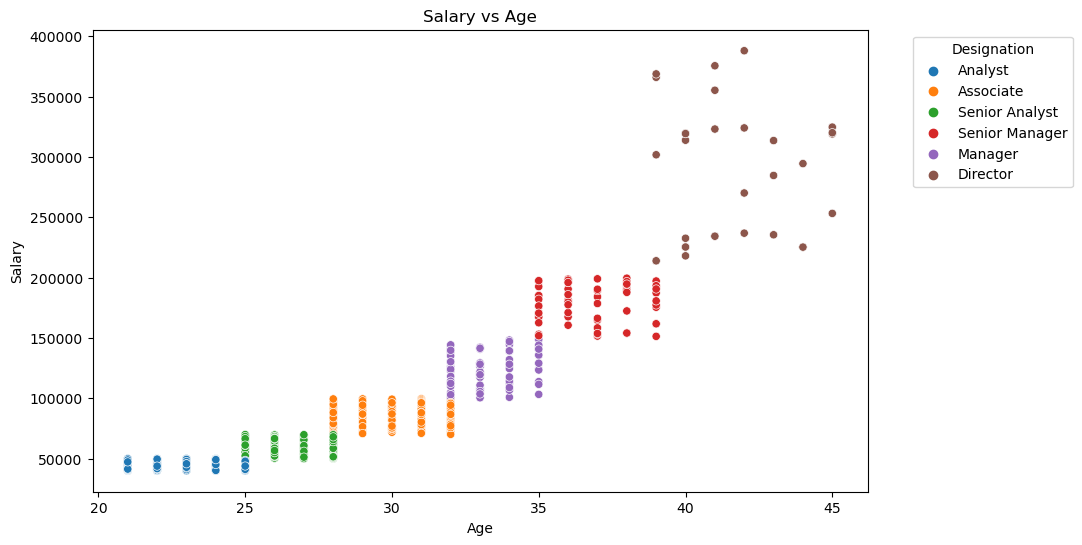

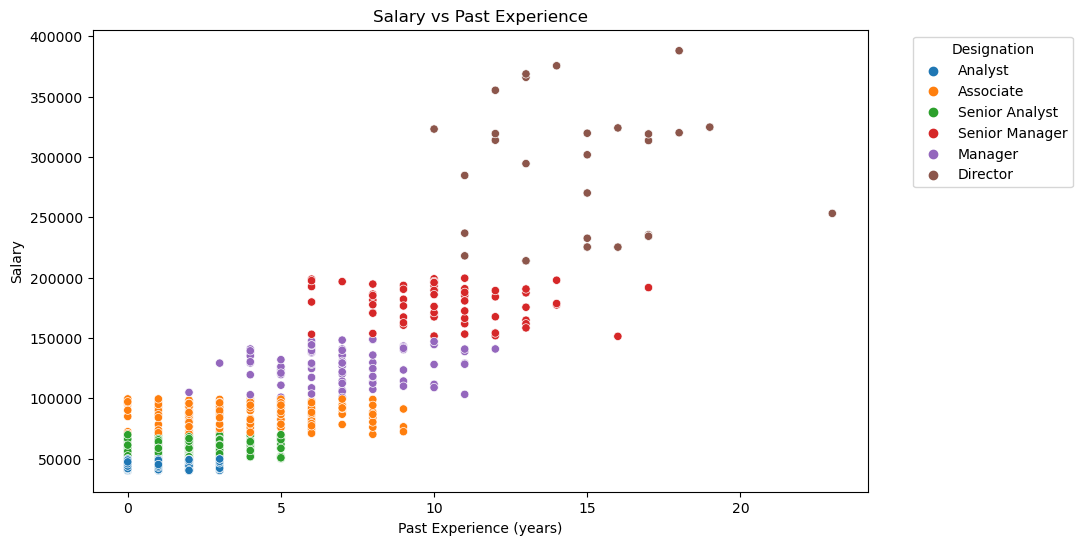

In [69]:
# Scatter plot of SALARY vs AGE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=df, hue='DESIGNATION')
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot of SALARY vs PAST EXP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PAST EXP', y='SALARY', data=df, hue='DESIGNATION')
plt.title('Salary vs Past Experience')
plt.xlabel('Past Experience (years)')
plt.ylabel('Salary')
plt.legend(title='Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

SALARY VS AGE

From the scatter plot of salary versus age, we can observe the following trends:

Positive Correlation between Age and Salary:

As age increases, salary generally increases, indicating a positive correlation between age and salary.
Designation Progression:

Analyst (Blue): Analysts tend to be younger and have lower salaries.

Associate (Green): Associates are slightly older than analysts and earn more.

Senior Analyst (Orange): Senior analysts earn more than associates and tend to be older.

Manager (Purple): Managers earn significantly more and are typically in the 30-35 age range.

Senior Manager (Red): Senior managers earn higher salaries and are usually between 35-40 years old.

Director (Brown): Directors have the highest salaries and are typically the oldest, around 40-45 years old.

Salary Increments by Age and Role:

There is a clear step-up in salary with each designation level as age increases, reflecting career progression.

As past experience (in years) increases along the x-axis, the salary (on the y-axis) also tends to increase. This indicates a strong positive correlation between years of experience and salary - the more experience a professional has, the higher their salary tends to be.
Additionally, the plot reveals:

Higher-level roles (e.g., Directors, Senior Managers) generally have higher salaries compared to lower-level roles (e.g., Analysts, Associates) at any given level of experience.
The salary spread widens as experience increases, suggesting that factors other than just experience (like job designation) significantly influence salary in later career stages.
There's a steeper salary increase for higher-level positions as experience grows, indicating that experience pays off more in senior roles.

Box Plot of SALARY by UNIT
To see variations in salary by different units or departments

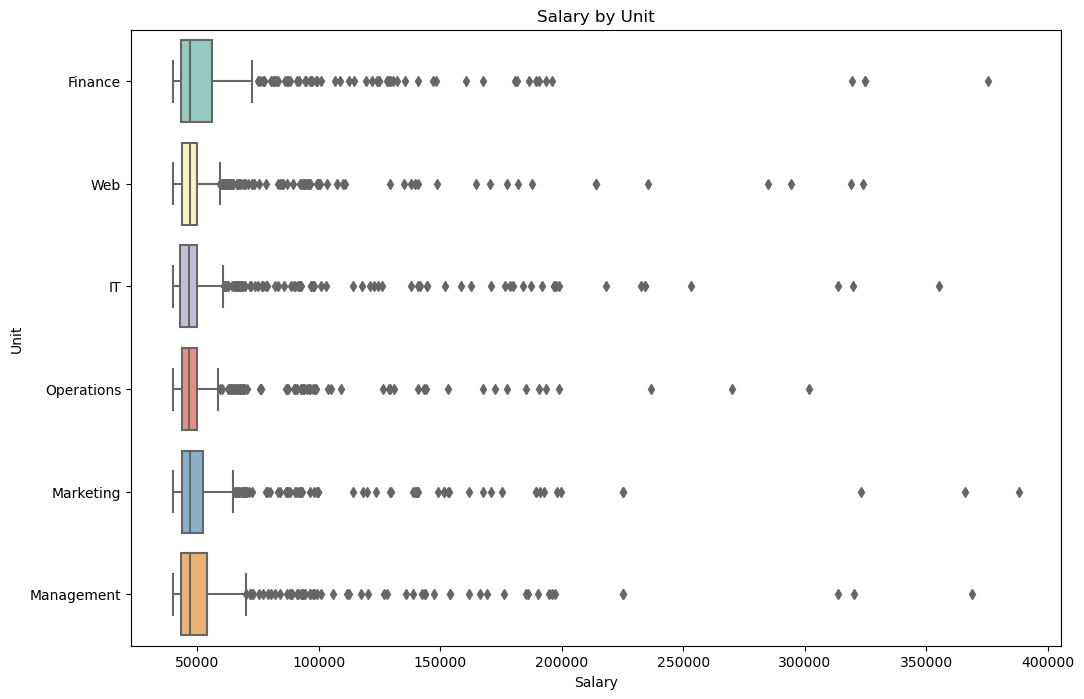

In [70]:
# Box plot of SALARY by UNIT
plt.figure(figsize=(12, 8))
sns.boxplot(x='SALARY', y='UNIT', data=df, palette='Set3')
plt.title('Salary by Unit')
plt.xlabel('Salary')
plt.ylabel('Unit')
plt.show()



The box plot shows the distribution of salaries across different business units or departments. The key trends observed are:

Salary by Unit:

1 All units have a wide range of salaries, indicated by the long whiskers on the box plots.

2 Finance seems to have the highest median salary, followed closely by Web and IT.

3 Operations and Marketing have slightly lower median salaries.

4 There are numerous outliers (high salaries) in most units, particularly in Finance, Web, and IT.f
or some.

In summary, the main trends are:
- Salary varies significantly by unit
- Wide salary ranges within each unit
- Many high-salary outliers
- Finance appears to offer the highest salaries
- Similar salary distribution pattern across all units

2. Feature Engineering:
Create new features that might better predict salary:


TENURE: Calculate from DOJ and CURRENT DATE.

LEAVE_UTILIZATION: LEAVES USED / (LEAVES USED + LEAVES REMAINING).

EXPERIENCE_LEVEL: Bucketize PAST EXP into categories (e.g., "Junior", "Senior").

One-hot encode DESIGNATION and UNIT.(One-hot encoding is a process used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. )

Create binary feature IS_MANAGER based on DESIGNATION.

In [85]:
# Convert DOJ and CURRENT DATE to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Create TENURE
df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365

# Create LEAVE_UTILIZATION
df['LEAVE_UTILIZATION'] = df['LEAVES USED'] / (df['LEAVES USED'] + df['LEAVES REMAINING'])

# Create EXPERIENCE_LEVEL
def categorize_experience(exp):
    if exp < 3:
        return 'Junior'
    elif exp < 7:
        return 'Mid'
    else:
        return 'Senior'

df['EXPERIENCE_LEVEL'] = df['PAST EXP'].apply(categorize_experience)

# One-Hot Encode DESIGNATION and UNIT
df = pd.get_dummies(df, columns=['DESIGNATION', 'UNIT'], drop_first=True)

# Create IS_MANAGER
df['IS_MANAGER'] = df['DESIGNATION_Manager'] | df['DESIGNATION_Senior Manager']

# Drop the original CURRENT DATE and DOJ columns as they are no longer needed
df.drop(columns=['DOJ', 'CURRENT DATE'], inplace=True)

# Display the first few rows of the updated DataFrame
df.head()


,FIRST NAME,LAST NAME,SEX,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE,...,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,IS_MANAGER
0,TOMASA,ARMEN,F,21.0,44570,24.0,6.0,2.0,0,1.641096,...,False,False,False,False,False,False,False,False,False,False
1,ANNIE,NaN,F,NaN,89207,NaN,13.0,NaN,7,NaN,...,False,False,False,False,False,False,False,False,True,False
2,OLIVE,ANCY,F,21.0,40955,23.0,7.0,3.0,0,1.446575,...,False,False,False,False,False,False,False,False,False,False
3,CHERRY,AQUILAR,F,22.0,45550,22.0,8.0,3.0,0,2.764384,...,False,False,False,False,True,False,False,False,False,False
4,LEON,ABOULAHOUD,M,NaN,43161,27.0,3.0,NaN,3,1.131507,...,False,False,False,False,False,False,False,True,False,False


Explanation:

Convert Dates to Datetime:
DOJ and CURRENT DATE are converted to datetime objects for date manipulation.


Calculate TENURE:
TENURE is calculated as the difference in days between CURRENT DATE and DOJ, then converted to years.


Calculate LEAVE_UTILIZATION:
The ratio of LEAVES USED to the total leaves (LEAVES USED + LEAVES REMAINING).

Categorize EXPERIENCE_LEVEL:
PAST EXP is bucketized into "Junior", "Mid", and "Senior" categories based on experience years.


One-Hot Encode DESIGNATION and UNIT:
DESIGNATION and UNIT are one-hot encoded to create dummy variables for each category.

Create IS_MANAGER:
A binary feature IS_MANAGER is created by checking if the designation is "Manager" or "Senior Manager"

3. Data Preprocessing:


Handle Missing Values:
Check for nulls using .isnull().sum().
Decide whether to fill or drop based on the extent of missing values.


Encode Categorical Variables:
Use pd.get_dummies() for one-hot encoding.
Use LabelEncoder for ordinal variables like RATINGS.

Scale Numerical Features:
Use StandardScaler or MinMaxScaler from sklearn to scale numerical features.

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 1. Handle Missing Values
# Check for null values
missing_values = df.isnull().sum()
print(missing_values)

# Decide to fill or drop based on the extent
# For simplicity, let's fill numerical columns with the median and categorical columns with the mode
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

#Fill Missing Numerical Values with Median
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

#Fill Missing Categorical Values with Mode:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


# Apply LabelEncoder for ordinal variables like RATINGS
label_encoder = LabelEncoder()
df['RATINGS'] = label_encoder.fit_transform(df['RATINGS'])

# 4. Scale Numerical Features
# Define numerical features to scale
numerical_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE', 'LEAVE_UTILIZATION']

# Initialize the scaler (use StandardScaler or MinMaxScaler)
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the processed DataFrame
df.head()


FIRST NAME                    0
LAST NAME                     2
SEX                           0
AGE                           3
SALARY                        0
LEAVES USED                   3
LEAVES REMAINING              2
RATINGS                       2
PAST EXP                      0
TENURE                        1
LEAVE_UTILIZATION             5
EXPERIENCE_LEVEL              0
DESIGNATION_Associate         0
DESIGNATION_Director          0
DESIGNATION_Manager           0
DESIGNATION_Senior Analyst    0
DESIGNATION_Senior Manager    0
UNIT_IT                       0
UNIT_Management               0
UNIT_Marketing                0
UNIT_Operations               0
UNIT_Web                      0
IS_MANAGER                    0
dtype: int64


,FIRST NAME,LAST NAME,SEX,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE,...,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,IS_MANAGER
0,TOMASA,ARMEN,F,-0.961653,44570,0.325810,-0.326827,-1.333290,-0.574391,-0.614979,...,False,False,False,False,False,False,False,False,False,False
1,ANNIE,AAKRE,F,-0.193476,89207,-0.108878,1.194715,-0.435929,1.991686,-0.111828,...,False,False,False,False,False,False,False,False,True,False
2,OLIVE,ANCY,F,-0.961653,40955,0.108466,-0.109464,-0.435929,-0.574391,-0.831487,...,False,False,False,False,False,False,False,False,False,False
3,CHERRY,AQUILAR,F,-0.705594,45550,-0.108878,0.107899,-0.435929,-0.574391,0.635275,...,False,False,False,False,True,False,False,False,False,False
4,LEON,ABOULAHOUD,M,-0.193476,43161,0.977840,-0.978917,-0.435929,0.525356,-1.182168,...,False,False,False,False,False,False,False,True,False,False


Explanation of Each Step:

Handle Missing Values:

We first check for missing values using df.isnull().sum().
Numerical columns are filled with their median values, and categorical columns are filled with their mode values. This is a simple imputation strategy; depending on the dataset, more sophisticated methods might be needed.

Encode Categorical Variables:
Use pd.get_dummies() to perform one-hot encoding on non-ordinal categorical variables SEX.
Use LabelEncoder for ordinal variables like RATINGS to convert them into numerical values.

Scale Numerical Features:
Numerical features like AGE, TENURE, LEAVE_UTILIZATION, and PAST EXP are scaled using StandardScaler (which standardizes features by removing the mean and scaling to unit variance) or MinMaxScaler (which scales features to a given range, typically [0, 1]).
This preprocessing prepares the dataset for machine learning model training by handling missing values, encoding categorical variables, and scaling numerical features appropriately.



Handling missing values in a principled way, which is essential for many machine learning algorithms that cannot handle missing data.

Encoding categorical variables (like 'RATINGS') into numerical format, as required by most machine learning algorithms.

Scaling numerical features to a common range or distribution, which can improve the performance of certain algorithms and prevent features with larger 

scales from dominating the learning process.

4. 4. Machine Learning Model Development
Split data into training and testing sets:


In [87]:
# Numerical features
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE', 'LEAVE_UTILIZATION']

# Categorical features (already one-hot encoded)
designation_features = [col for col in df.columns if col.startswith('DESIGNATION_')]
unit_features = [col for col in df.columns if col.startswith('UNIT_')]

# Binary features
binary_features = ['IS_MANAGER']

# Combine all features
features = numeric_features + designation_features + unit_features + binary_features

Explanation:

include all relevant numerical features,Since 'DESIGNATION' and 'UNIT' are already one-hot encoded, include all  columns.

'IS_MANAGER' is a binary feature created,indicating if the role is managerial.

 exclude 'FIRST NAME', 'LAST NAME', 'SEX', and 'EXPERIENCE_LEVEL'. Names are not predictive, 'SEX' might lead to bias, and 'EXPERIENCE_LEVEL' might be redundant with 'PAST EXP' and 'TENURE'.

Create X and Y

This will show you how many samples and features there is

In [88]:
# Feature matrix X
X = df[features]

# Target vector y
y = df['SALARY']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2639, 18)
Shape of y: (2639,)


Split into training and testing

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (2111, 18)
Shape of X_test: (528, 18)


Try various regression models:

Linear Regression: from sklearn.linear_model import LinearRegression
Decision Tree: from sklearn.tree import DecisionTreeRegressor
Random Forest: from sklearn.ensemble import RandomForestRegressor
Gradient Boosting: from sklearn.ensemble import GradientBoostingRegressor

5. Model Evaluation

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = 'passthrough'

# Create the preprocessing object
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE', 'LEAVE_UTILIZATION']
categorical_features = ['DESIGNATION_Associate', 'DESIGNATION_Director', 'DESIGNATION_Manager',
                        'DESIGNATION_Senior Analyst', 'DESIGNATION_Senior Manager', 'UNIT_IT',
                        'UNIT_Management', 'UNIT_Marketing', 'UNIT_Operations', 'UNIT_Web', 'IS_MANAGER']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In this code:

i first import the necessary classes from scikit-learn: Pipeline, StandardScaler, ColumnTransformer, and RandomForestRegressor.

ii define the preprocessing steps for numerical and categorical features:
numeric_transformer is an instance of StandardScaler(), which will standardize the numerical features.
categorical_transformer is set to 'passthrough' because the categorical features are already one-hot encoded.

iii  specify the lists of numerical and categorical feature names.

iv  create the preprocessor object using ColumnTransformer, which applies the corresponding transformers to the specified feature subsets.

v   create the pipeline object using Pipeline, which chains the preprocessing and regression steps together.

6. ML Pipelines and Model Deployment:

This  apply the preprocessing steps and train the Random Forest model in one go

In [91]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE', 'LEAVES USED',
                                                   'LEAVES REMAINING',
                                                   'RATINGS', 'PAST EXP',
                                                   'TENURE',
                                                   'LEAVE_UTILIZATION']),
                                                 ('cat', 'passthrough',
                                                  ['DESIGNATION_Associate',
                                                   'DESIGNATION_Director',
                                                   'DESIGNATION_Manager',
                                                   'DESIGNATION_Senior Analyst',
                                                   'DESIGNATION_Senior Manager',
                                                   'UNIT_IT', 'UNIT_Management',
                                                   'UNIT_Marketing',
                                                   'UNIT_Operations',
                                                   'UNIT_Web',
                                                   'IS_MANAGER'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [92]:
y_pred = pipeline.predict(X_test)

The pipeline will automatically preprocess the new data and pass it through the trained model.

The below code Evaluate the model's performance

In [93]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: $4636.47
R-squared: 0.93


Interpreting these metrics together, we can say that your salary prediction model performs very well

The MAE of $4636.47 suggests that the model's predictions are reasonably accurate

The high R² value of 0.93 indicates that the model captures a significant portion of the factors influencing salaries and can explain most of the variance in the data.

In [96]:
from sklearn.linear_model import LinearRegression
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [97]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 4639.850489561885
Mean Squared Error (MSE): 96748558.12502667
Root Mean Squared Error (RMSE): 9836.08449155591
R-squared (R2): 0.941736581972638
